<a href="https://colab.research.google.com/github/sanikadeshmukh/devops/blob/main/bdl2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from google.colab import drive
drive.mount('/content/drive/')


Mounted at /content/drive/


In [5]:
import os
os.getcwd()
os.chdir('/content/drive/My Drive')

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
import io
import matplotlib.pyplot as plt
import numpy as np
from scipy.cluster.vq import whiten, kmeans, vq


In [8]:
import io
df = pd.read_csv('diabetes.csv')
df.head() 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [9]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [10]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

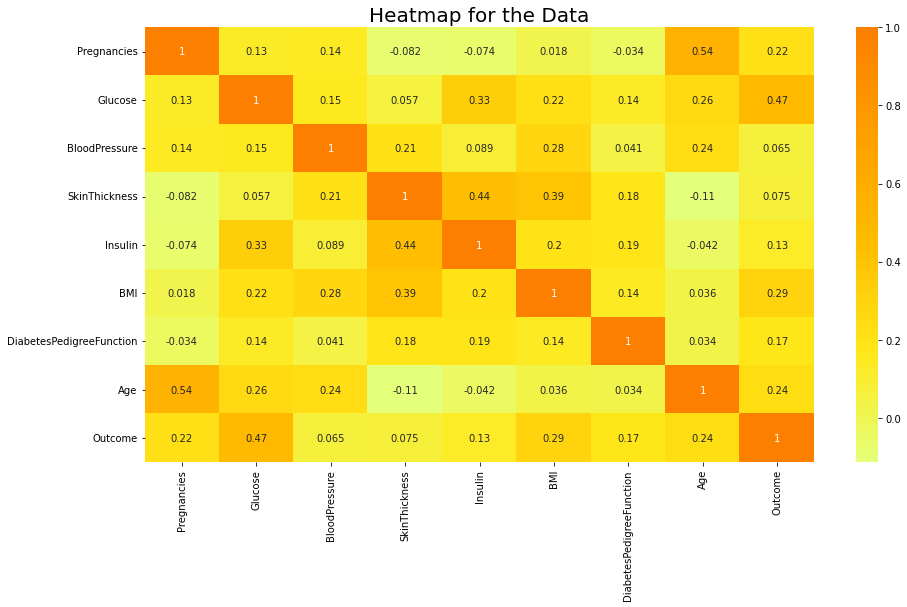

In [11]:
plt.rcParams['figure.figsize'] = (15, 8)
sns.heatmap(df.corr(), cmap = 'Wistia', annot = True)
plt.title('Heatmap for the Data', fontsize = 20)
plt.show()

In [ ]:
x1 = df2.iloc[:, [3, 4]].values

In [ ]:
print(x1.shape)

(768, 2)


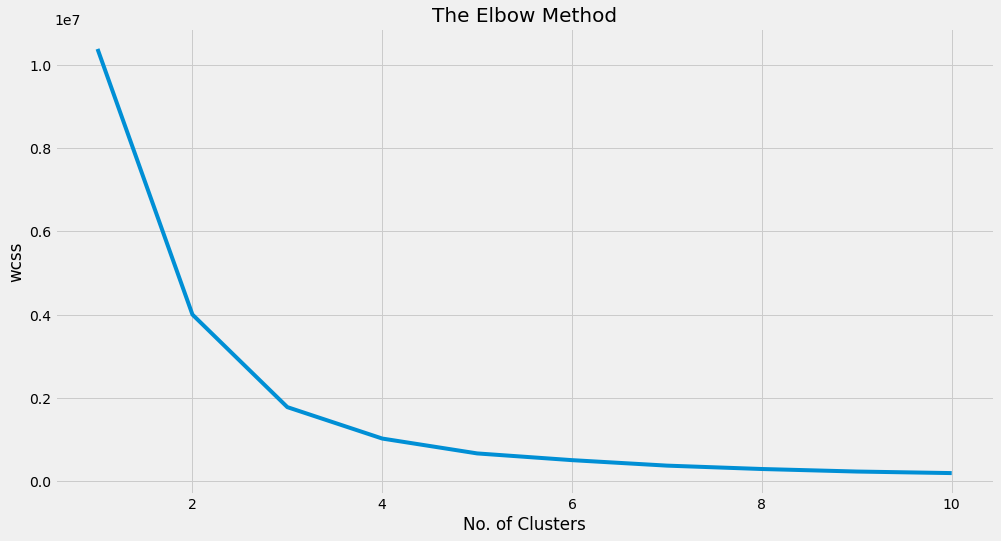

In [ ]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
  km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
  km.fit(x1)
  wcss.append(km.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

In [ ]:
km = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(x1)

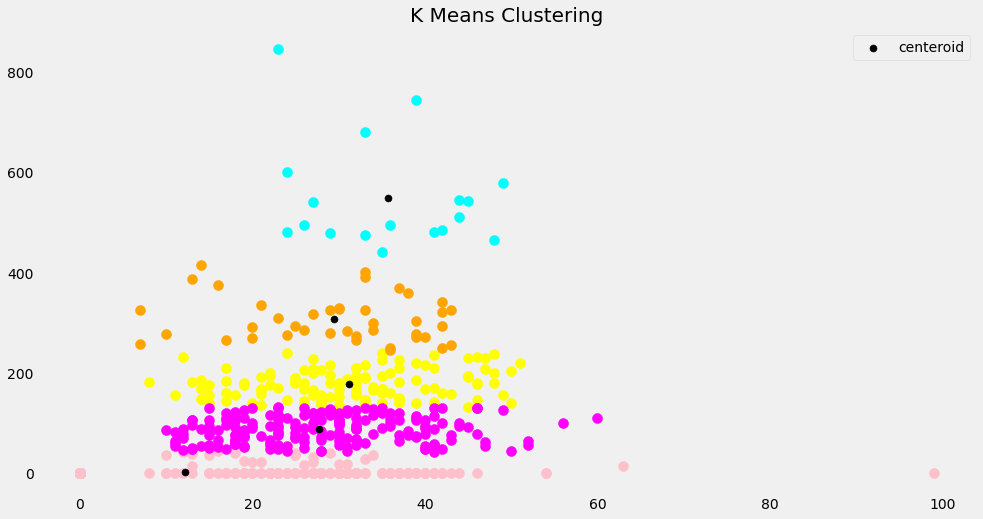

In [ ]:
plt.scatter(x1[y_means == 0, 0], x1[y_means == 0, 1], s = 100, c = 'pink')
plt.scatter(x1[y_means == 1, 0], x1[y_means == 1, 1], s = 100, c = 'yellow')
plt.scatter(x1[y_means == 2, 0], x1[y_means == 2, 1], s = 100, c = 'cyan')
plt.scatter(x1[y_means == 3, 0], x1[y_means == 3, 1], s = 100, c = 'magenta')
plt.scatter(x1[y_means == 4, 0], x1[y_means == 4, 1], s = 100, c = 'orange')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'black' , label = 'centeroid')
plt.style.use('fivethirtyeight')
plt.title('K Means Clustering', fontsize = 20)
plt.legend()
plt.grid()
plt.show()

In [ ]:
x = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [ ]:
#Training set and Test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(576, 8)
(192, 8)
(576,)
(192,)


In [ ]:
from sklearn.preprocessing import StandardScaler 
scale = StandardScaler()
x_train_std = scale.fit_transform(x_train)
x_test_std = scale.transform(x_test)

In [ ]:
#import knn library
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=25)
#fit the model
knn.fit(x_train_std, y_train)
#predict the model
knn_pred = knn.predict(x_test_std)

In [ ]:
#import the metric method
from sklearn import metrics
print("Model Validation ==>\n")
print("Accuracy Score of KNN Model::")
print(metrics.accuracy_score(y_test,knn_pred))
print("\n", "Classification Report::")
print(metrics.classification_report(y_test,knn_pred), '\n')

Model Validation ==>

Accuracy Score of KNN Model::
0.7604166666666666

 Classification Report::
              precision    recall  f1-score   support

           0       0.77      0.92      0.84       130
           1       0.71      0.44      0.54        62

    accuracy                           0.76       192
   macro avg       0.74      0.68      0.69       192
weighted avg       0.75      0.76      0.74       192
 



In [ ]:
#Modeling SVC classifier
from sklearn.svm import SVC
classifier_rbf = SVC(kernel = 'rbf', random_state= 0)
classifier_rbf.fit(x_train_std, y_train)
#predicting
scv_pred_rbf = classifier_rbf.predict(x_test_std)

Model Validation ==>

RBF Kernel Accuracy of SVC Classifier::
0.7760416666666666

 Classification Report::
              precision    recall  f1-score   support

           0       0.80      0.90      0.84       130
           1       0.71      0.52      0.60        62

    accuracy                           0.78       192
   macro avg       0.75      0.71      0.72       192
weighted avg       0.77      0.78      0.77       192
 


 ROC Curve


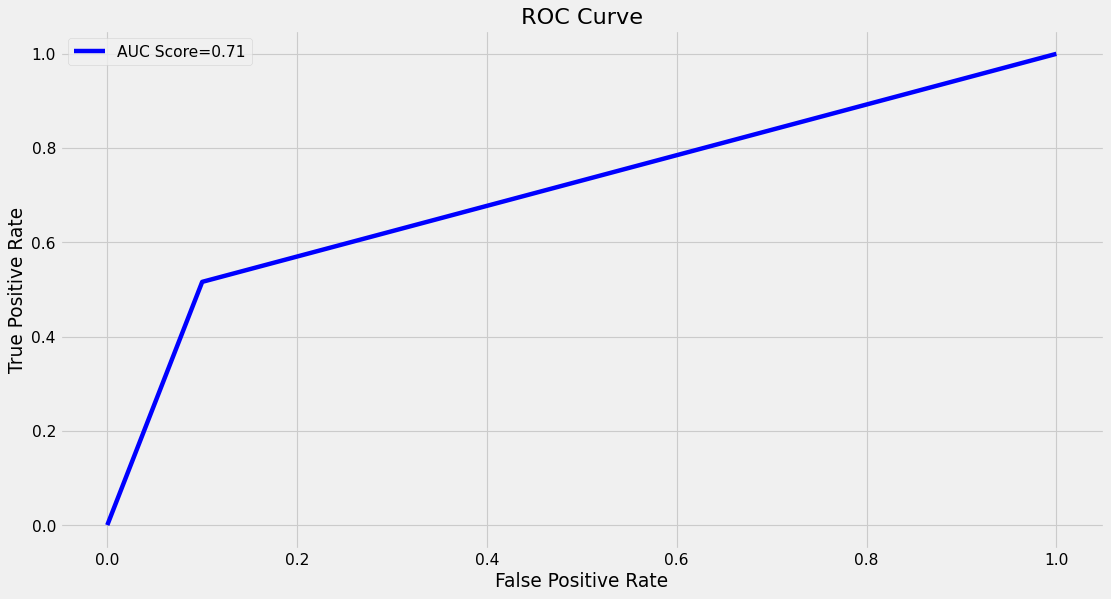

In [ ]:
from sklearn.metrics import accuracy_score
print("Model Validation ==>\n")
print("RBF Kernel Accuracy of SVC Classifier::")
print(metrics.accuracy_score(y_test,classifier_rbf.predict(x_test_std)))
print("\n", "Classification Report::")
print(metrics.classification_report(y_test,classifier_rbf.predict(x_test_std)), '\n')
print("\n", "ROC Curve")
svc_prob_rbf=classifier_rbf.predict_proba(x_test_std)
knn_prob_rbf1=svc_prob_rbf[:,1]
fpr,tpr,thresh=metrics.roc_curve(y_test,classifier_rbf.predict(x_test_std))
roc_auc_svc=metrics.auc(fpr,tpr)
plt.figure(dpi=80)
plt.title("ROC Curve")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot(fpr,tpr,'b', label='AUC Score=%0.2f'%roc_auc_svc)
plt.legend()